# Importar librerías y datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_students=pd.read_csv('datasets/clean_students_complete.csv',index_col=0).set_index('Student ID')
data_students.head()

,student_name,gender,grade,school_name,reading_score,math_score
Student ID,,,,,,
0,Paul Bradley,M,9th,Huang High School,66,79
1,Victor Smith,M,12th,Huang High School,94,61
2,Kevin Rodriguez,M,12th,Huang High School,90,60
3,Richard Scott,M,12th,Huang High School,67,58
4,Bonnie Ray,F,9th,Huang High School,97,84


In [3]:
data_students.school_name.unique()

array(['Huang High School', 'Figueroa High School', 'Shelton High School',
       'Hernandez High School', 'Griffin High School',
       'Wilson High School', 'Cabrera High School', 'Bailey High School',
       'Holden High School', 'Pena High School', 'Wright High School',
       'Rodriguez High School', 'Johnson High School', 'Ford High School',
       'Thomas High School'], dtype=object)

# Actividad Básica: Puntaje Reading 2

Crea / Presenta la forma que creas más conveniente para describir qué grado por escuela tuvo el mejor puntaje en "reading" y con ello saber que genero es el que predomina en este filtro.

In [4]:
def mejor_puntaje_reading(df,school_name,grade):
    # seleccionar dataframe de la escuela y grado
    df_selected=df.loc[(df.school_name==school_name)&(df.grade==grade)].copy()
    
    # mostrar el mejor puntaje por género
    df_selected.loc[df_selected.reading_score==df_selected.reading_score.max(),'gender'].value_counts().plot.pie(figsize=(10,10),
                                                                                                 autopct='%.2f %%')
    plt.title(f'Cantidad de alumnos con el mejor puntaje para el {grade} grado de la escuela {school_name}')
    plt.legend()
    plt.show()

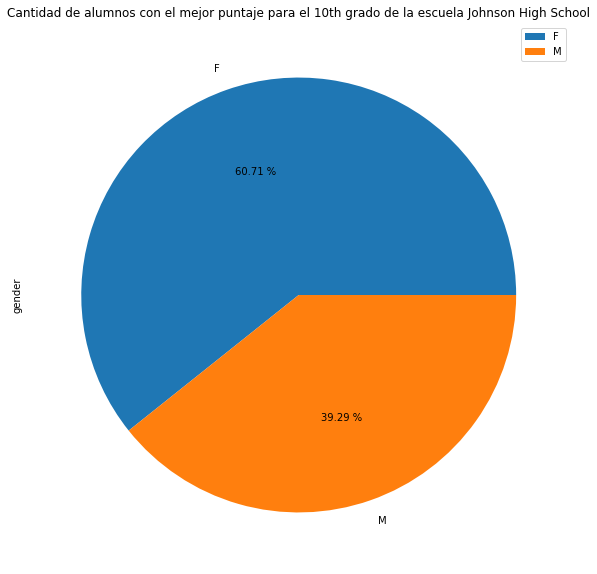

In [5]:
mejor_puntaje_reading(data_students,'Johnson High School','10th')

# Actividad Avanzada: Puntaje Reading 2

Identifica a los alumnos con el mismo apellido que van en la misma escuela y evalúa las familias (misma escuela, mismo apellido) que tengan mejor puntaje en "reading". Presenta tus resultados de forma visual. 

In [6]:
# hacer una copia el dataframe
df_name=data_students.copy()

# verificar que los nombres de alumnos constente de Nombre + Apellido, se asume que solo el primer string antes
# del espacio, por lo que así se tomaría un apellido compuesto en caso existiera
flag_name=all([True if len(i.split())>=2 else False for i in df_name.student_name.values])

# mostrar estado del flag
flag_name

True

In [7]:
# como flag_name==True, se puede asumir que lo nombres están de la siguiente manera Nombre + Apellido, donde
# apellido puede ser compuesto, por lo que se tomara a partir del valor 1 hacia adelante
# agregar la columna apellido
df_name['surname']=df_name['student_name'].apply(lambda x:' '.join(x.split()[1:]))

# mostrar valors únicos de surname
df_name.surname.unique()

array(['Bradley', 'Smith', 'Rodriguez', ..., 'Schultz II', 'Scott Jr.',
       'Patel Jr.'], dtype=object)

In [8]:
# identificar a los alumnos con el mismo apellido que van a la misma escuela
filter_families=df_name.groupby(['school_name','surname'])['surname'].count()

# filtrar aquellos que tengan al menos 2 repeticiones, esto sirve para identificar
# los apellidos que se repiten
index_same_surname=filter_families[filter_families>1].index.values

# extraer las escuelas con su lista de apellidos repetidos
list_apellidos=list()
dic_apellidos=dict()
for i in range(len(index_same_surname)-1):
    if index_same_surname[i][0]==index_same_surname[i+1][0]:
        list_apellidos.append(index_same_surname[i][1])
    else:
        dic_apellidos[index_same_surname[i][0]]=list_apellidos
        list_apellidos=[]
        
# agregador ultimo valor al final
list_apellidos.append(index_same_surname[-1][1])
dic_apellidos[index_same_surname[-1][0]]=list_apellidos
print(dic_apellidos.keys())

dict_keys(['Bailey High School', 'Cabrera High School', 'Figueroa High School', 'Ford High School', 'Griffin High School', 'Hernandez High School', 'Holden High School', 'Huang High School', 'Johnson High School', 'Pena High School', 'Rodriguez High School', 'Shelton High School', 'Thomas High School', 'Wilson High School', 'Wright High School'])


In [9]:
# se crea la función par evaluar por familia y apellidos
def plot_familia_escuela(df,school_name):
    global dic_apellidos
    if school_name in dic_apellidos.keys():
        # obtener dataframe acorde al diccionario para el reading
        df_reading=df.loc[(df.school_name==school_name)&(df.surname.isin(dic_apellidos[school_name]))].copy()
        
        # obtener el dataframe donde el puntaje de reading sea máximo y obtener las familias
        df_reading.loc[df_reading.reading_score==df_reading.reading_score.max(),'surname'].value_counts().sort_values(ascending=True).plot(kind='barh',
                                                                                                              figsize=(50,100))
        # poner titulo
        plt.title(f'Familias de la escuela {school_name} con un puntaje máximo de {df_reading.reading_score.max()}',size=50)
        plt.tick_params(axis='y', which='both', labelsize=30)
        plt.tick_params(axis='x', which='both', labelsize=30)
    else:
        print('La Escuela no tiene familias')

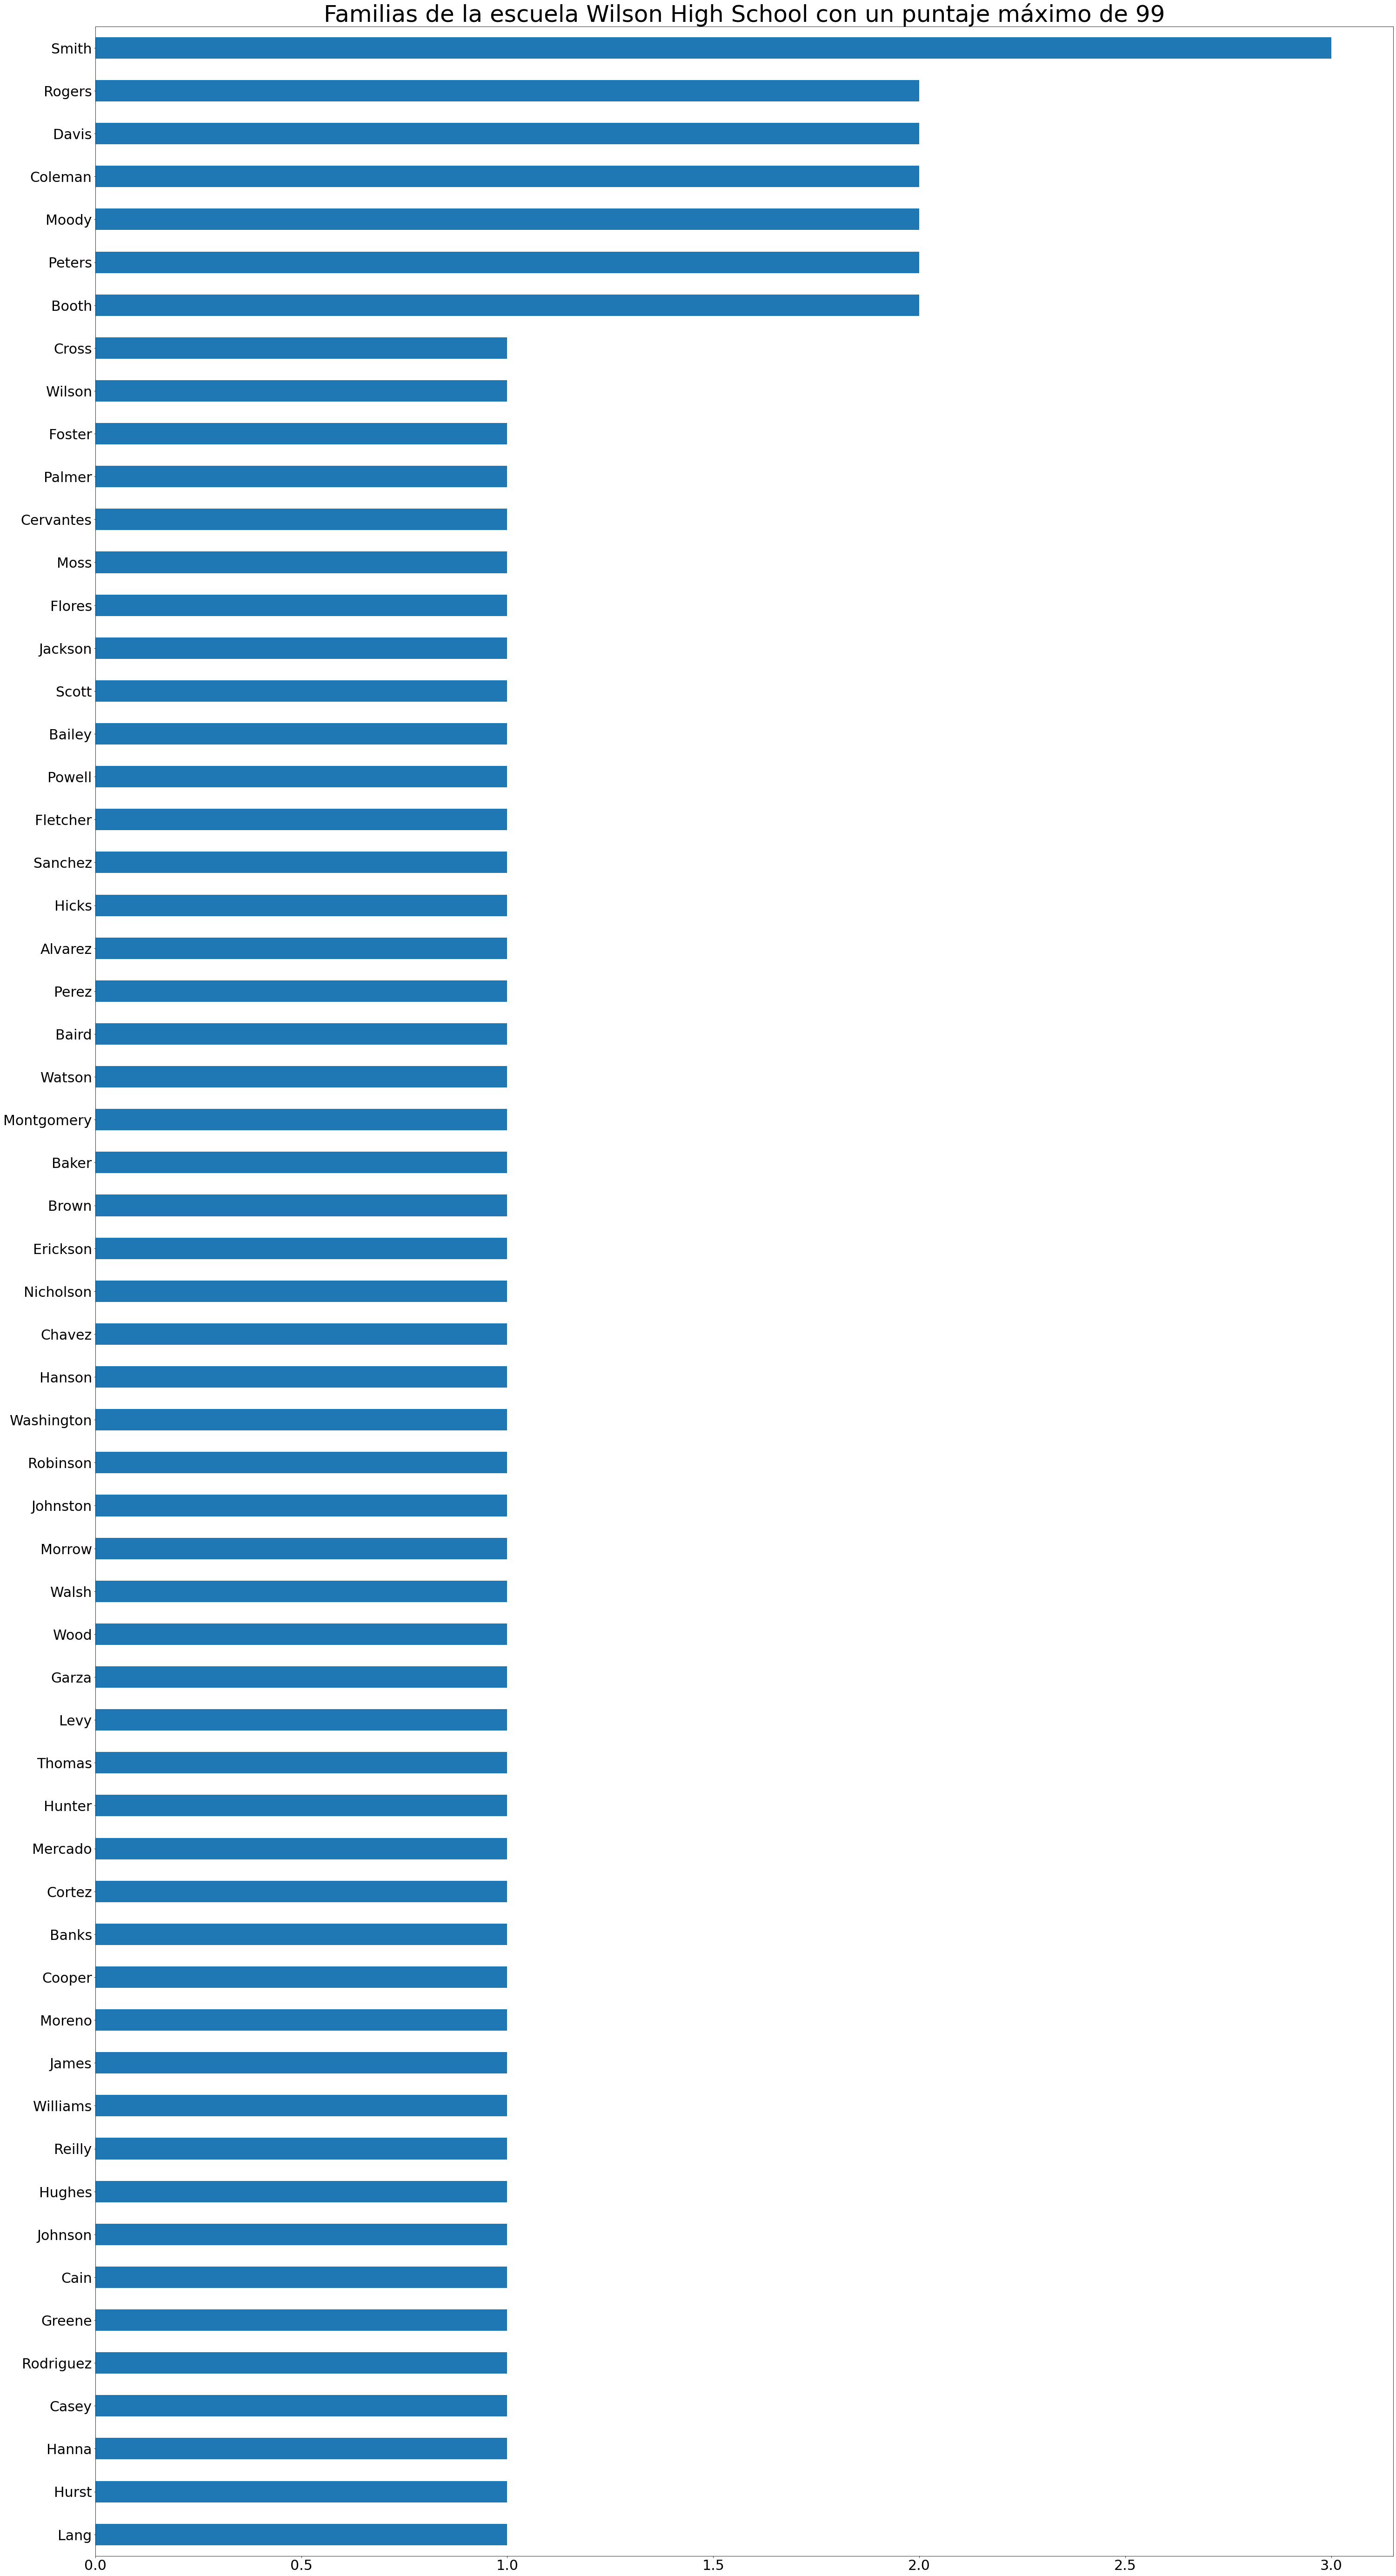

In [10]:
# Escoger la familia, el df_name ya contiene la variable surname y la función cuenta internamente con el
# diccionario obtenido sobre aquellas escuelas que tienen más de un apellido para poder formar una familia
plot_familia_escuela(df_name,'Wilson High School')